<a href="https://colab.research.google.com/github/md-kasim/tf/blob/master/Simple_2D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Build a Simple 2D CNN for MNIST Digit Recogniser

In [1]:
!pip install tensorflow-gpu==2.0.0

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf

In [4]:
print(tf.__version__)

2.0.0


In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

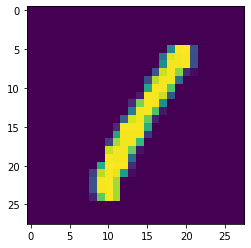

In [7]:
plt.imshow(X_train[3])

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
input_shape = X_train[0].shape

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.1736 - accuracy: 0.9479 - val_loss: 0.0525 - val_accuracy: 0.9816
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.0339 - val_accuracy: 0.9890
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0305 - val_accuracy: 0.9901
Epoch 4/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0317 - val_accuracy: 0.9894
Epoch 5/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0309 - val_accuracy: 0.9902
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0329 - val_accuracy: 0.9895
Epoch 7/10
60000/60000 [=========================

In [19]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.031956454421336024, 0.9913]

In [0]:
def plot_learning_curve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

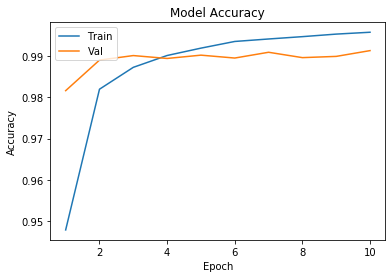

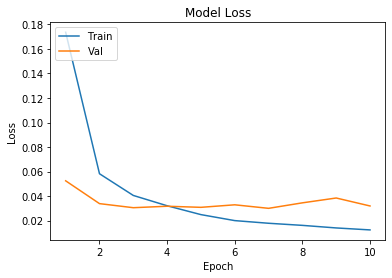

In [21]:
plot_learning_curve(history, 10)